In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
startup=pd.read_csv('50_Startups.csv')
startup.head(2)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


In [3]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


## Data wrangling 

In [4]:
# Renamming column 
startup1 = startup.rename({'R&D Spend': 'R_D'},axis=1)
startup1.head(2)

,R_D,Administration,Marketing Spend,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


In [5]:
startup2 = startup1.rename({'Marketing Spend': 'Marketing_Spend'},axis=1)
startup2.head(2)

,R_D,Administration,Marketing_Spend,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


In [6]:
# converting object into categorical 
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()
label=le.fit_transform(startup2["State"])
startup2["state1"]=label

In [7]:
startup2.head()

,R_D,Administration,Marketing_Spend,State,Profit,state1
0,165349.20,136897.80,471784.10,New York,192261.83,2
1,162597.70,151377.59,443898.53,California,191792.06,0
2,153441.51,101145.55,407934.54,Florida,191050.39,1
3,144372.41,118671.85,383199.62,New York,182901.99,2
4,142107.34,91391.77,366168.42,Florida,166187.94,1


In [8]:
#Drop the state column 
startup2.drop(["State"],inplace=True,axis=1)
startup2.head(5)

,R_D,Administration,Marketing_Spend,Profit,state1
0,165349.20,136897.80,471784.10,192261.83,2
1,162597.70,151377.59,443898.53,191792.06,0
2,153441.51,101145.55,407934.54,191050.39,1
3,144372.41,118671.85,383199.62,182901.99,2
4,142107.34,91391.77,366168.42,166187.94,1


In [9]:
startup2.describe()

,R_D,Administration,Marketing_Spend,Profit,state1
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200,1.000000
std,45902.256482,28017.802755,122290.310726,40306.180338,0.832993
min,0.000000,51283.140000,0.000000,14681.400000,0.000000
25%,39936.370000,103730.875000,129300.132500,90138.902500,0.000000
50%,73051.080000,122699.795000,212716.240000,107978.190000,1.000000
75%,101602.800000,144842.180000,299469.085000,139765.977500,2.000000
max,165349.200000,182645.560000,471784.100000,192261.830000,2.000000


## Correlation

In [10]:
startup2.corr()

,R_D,Administration,Marketing_Spend,Profit,state1
R_D,1.000000,0.241955,0.724248,0.972900,0.104685
Administration,0.241955,1.000000,-0.032154,0.200717,0.011847
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766,0.077670
Profit,0.972900,0.200717,0.747766,1.000000,0.101796
state1,0.104685,0.011847,0.077670,0.101796,1.000000


## Scatterplot between the variables along histograms 

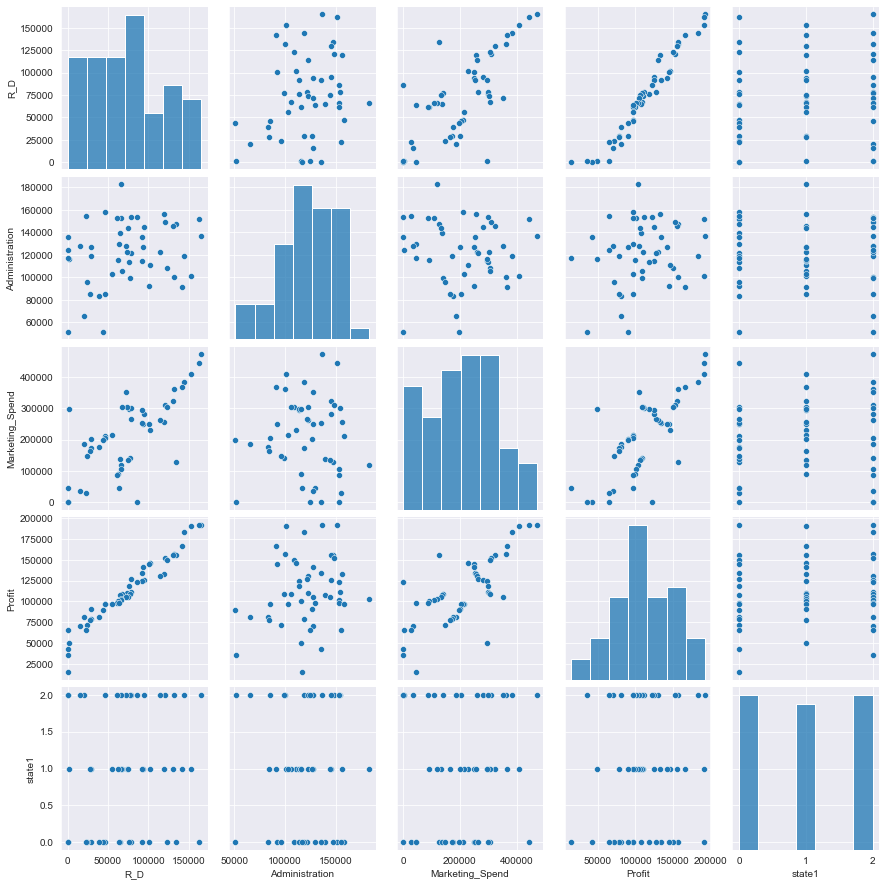

In [11]:
sns.set_style(style='darkgrid')
sns.pairplot(startup2)

## Preparing a Model  

In [12]:
model = smf.ols('Profit~R_D+Administration+Marketing_Spend+state1',data=startup2).fit()

In [13]:
model.params

Intercept          50142.506443
R_D                    0.805760
Administration        -0.026826
Marketing_Spend        0.027228
state1               -22.320577
dtype: float64

In [14]:
print(model.tvalues,'\n',model.pvalues)

Intercept           7.368962
R_D                17.608621
Administration     -0.519906
Marketing_Spend     1.636966
state1             -0.013865
dtype: float64 
 Intercept          2.900008e-09
R_D                8.249206e-22
Administration     6.056771e-01
Marketing_Spend    1.086131e-01
state1             9.889988e-01
dtype: float64


In [15]:
(model.rsquared,model.rsquared_adj)

(0.9507462044842656, 0.9463680893273114)

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Tue, 15 Jun 2021   Prob (F-statistic):           8.51e-29
Time:                        08:52:17   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.014e+04   6804.555      7.369      0.000    3.64e+04    6.38e+04
R_D                 0.8058      0.046     17.609      0.000       0.714       0.898
Administration     -0.0268      0.052     -0.520      0.606      -0.131       0.077
Marketing_Spend     0.0272      0.017      1.637      0.109      -0.006       0.061
state1            -22.3206   1609.829     -0.014      0.989   -3264.682    3220.041
==============================================================================
Omnibus:                       14.864   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.542
Skew:                          -0.949   Prob(JB):                     2.10e-05
Kurtosis:                       5.596   Cond. No.                     1.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Predicting for new data 

In [18]:
pred_y= model.predict(startup2)

In [19]:
pred_y

0     192502.764416
1     189182.666045
2     182150.958419
3     173677.490618
4     172142.800630
5     163561.207958
6     158138.912125
7     160023.604155
8     151721.158209
9     154909.306740
10    135510.373518
11    135597.513003
12    129138.878631
13    127510.971265
14    149550.343104
15    146214.627589
16    116937.893898
17    130170.798034
18    129015.068968
19    115613.227991
20    116662.142044
21    117296.983770
22    114706.943173
23    109996.456061
24    113341.039732
25    102259.490409
26    110600.452270
27    114385.558176
28    101659.114598
29    101772.028601
30     99451.953398
31     97664.712734
32     99023.176763
33     97914.373688
34     89060.017061
35     90488.403429
36     75284.111298
37     89641.233032
38     69673.280633
39     83750.156769
40     74836.310639
41     74800.891570
42     70640.771045
43     60142.131192
44     64631.116851
45     47625.138813
46     56162.996236
47     46509.563956
48     49146.573247
49     48234.273495


In [ ]:
# This model having rsquared value of 0.951 and adj-rsquared of 0.946